In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)

In [29]:
X = pd.read_csv('../House_info_data.csv',encoding='gbk')
Y = pd.read_csv('../House_price_data.csv',encoding='gbk')

In [30]:
data = X.loc[:,['HOUSE_SRN','CITY','AREA']]
Y.HOUSE_SRN = Y.HOUSE_SRN.astype(str)
total = pd.merge(data,Y,on="HOUSE_SRN",how='left')
total['DATA_DATE'] = pd.to_datetime(total['DATA_DATE'])
total['DATA_DATE_Y'] = total.DATA_DATE.dt.year
total['DATA_DATE_M'] = total.DATA_DATE.dt.month
total['DATA_DATE_RM'] = (total.DATA_DATE - pd.to_datetime('2004/01/01')).astype('timedelta64[M]') + 1
total = total.drop('HIGHEST_PRICE',axis=1)
total = total.drop('LOWEST_PRICE',axis=1)
total.dropna(how='any')
total.head()

,HOUSE_SRN,CITY,AREA,DATA_DATE,AVG_PRICE,DATA_DATE_Y,DATA_DATE_M,DATA_DATE_RM
0,1,北京,朝阳,2004-03-05,6000.0,2004.0,3.0,3.0
1,1,北京,朝阳,2012-03-09,4850.0,2012.0,3.0,99.0
2,1,北京,朝阳,2014-07-01,40782.0,2014.0,7.0,126.0
3,1,北京,朝阳,2014-12-01,35559.0,2014.0,12.0,131.0
4,1,北京,朝阳,2015-01-01,35358.0,2015.0,1.0,133.0


In [31]:
samp = total[total['AREA'] == u'朝阳'].groupby(['DATA_DATE_RM']).mean().reset_index()
samp.head()

,DATA_DATE_RM,AVG_PRICE,DATA_DATE_Y,DATA_DATE_M
0,-1.0,7885.000000,2003.0,11.125
1,0.0,6948.864407,2003.0,12.000
2,1.0,7003.870968,2004.0,1.000
3,2.0,6019.555556,2004.0,2.100
4,3.0,7576.533333,2004.0,3.000


In [32]:
samp.tail()

,DATA_DATE_RM,AVG_PRICE,DATA_DATE_Y,DATA_DATE_M
150,149.0,46304.484619,2016.0,5.878227
151,150.0,46762.524666,2016.0,6.894450
152,151.0,62956.477778,2016.0,7.000000
153,152.0,48250.321218,2016.0,8.000000
154,153.0,49306.053320,2016.0,9.000000


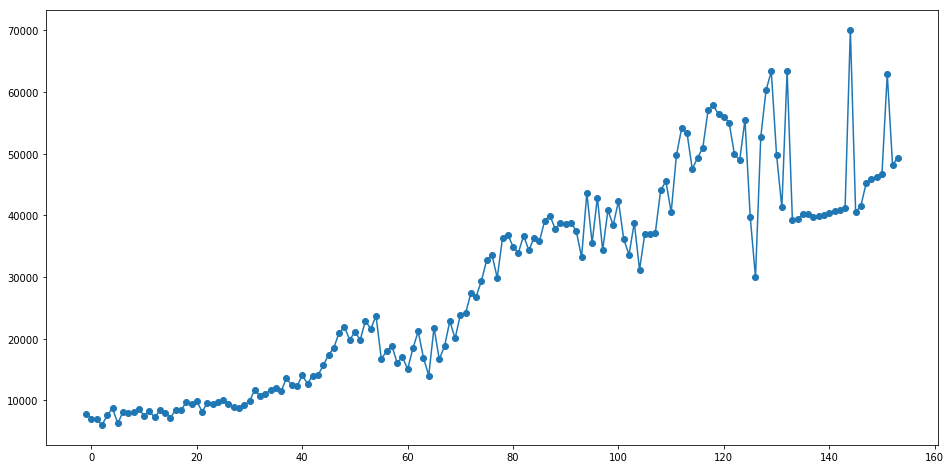

ValueError: Expected 2D array, got 1D array instead:
array=[  7885.           6948.86425781   7003.87109375   6019.55566406
   7576.53320312   8737.05859375   6283.75         8150.           7895.85302734
   8073.95166016   8567.16699219   7549.94580078   8267.37988281
   7250.56542969   8421.05566406   8024.09082031   7221.71435547
   8508.20019531   8382.12792969   9781.15429688   9399.69726562
   9867.02734375   8199.03027344   9573.68457031   9426.22851562
   9771.78417969  10034.43457031   9444.35253906   8901.52148438
   8778.45703125   9254.81445312   9877.84277344  11752.68261719
  10687.48730469  11031.95605469  11780.29589844  12071.5         11490.90917969
  13629.33300781  12434.90039062  12318.18164062  14083.87109375
  12732.8125      14040.51269531  14097.14257812  15720.          17368.76171875
  18551.96679688  21006.66601562  21925.          19852.94140625
  21092.85742188  19847.61914062  22939.13085938  21570.58789062
  23726.66601562  16755.5546875   17965.          18900.77734375
  16121.05273438  17038.66601562  15099.07714844  18445.45507812  21200.
  16919.61328125  14044.          21811.11132812  16715.15234375
  18778.29882812  22864.          20059.33398438  23877.14257812
  24195.45117188  27369.98046875  26842.          29392.30859375
  32768.29296875  33588.37109375  29893.33398438  36364.          36901.26171875
  34937.5         33919.046875    36710.52734375  34356.          36404.546875
  35811.5390625   39126.66796875  39978.26171875  37816.12890625
  38758.33203125  38680.953125    38847.05859375  37460.          33241.66796875
  43623.53125     35545.          42892.234375    34376.921875
  40823.6015625   38425.          42316.66796875  36157.58203125
  33626.66796875  38823.53125     31205.8828125   37055.5546875   37030.
  37228.5703125   44063.33203125  45544.6796875   40493.64453125
  49769.66796875  54208.2265625   53403.5078125   47530.66015625
  49332.05078125  50969.08984375  57023.5859375   57860.          56369.30859375
  56038.73828125  55000.          49985.71484375  48964.28515625  55500.
  39764.73828125  29984.94335938  52721.875       60297.296875
  63351.3515625   49800.          41289.71875     63363.63671875
  39301.30859375  39444.33203125  40199.546875    40268.7890625
  39758.87890625  39889.76171875  40068.61328125  40445.00390625
  40739.02734375  40831.453125    41193.31640625  70118.1796875
  40545.796875    41576.0625      45238.9453125   45905.80078125
  46304.484375    46762.5234375   62956.4765625   48250.3203125
  49306.0546875 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
# split into trainset and testset
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing


length = samp.shape[0]
a = samp.DATA_DATE_RM.values.reshape(length, 1)
samples = samp['AVG_PRICE'].astype(np.float32).values
plt.plot(a,samples.reshape(length,1),'-o')
plt.show()
min_max_scaler = preprocessing.MinMaxScaler()
samples = min_max_scaler.fit_transform(samples)
plt.plot(a,samples.reshape(length,1),'-o')
plt.show()

In [34]:
import tensorflow as tf

truncated_backprop_length = 15
input_size = 5
state_size = 4
num_classes = 1
# echo_step = 3
batch_size = 1
# num_batches = samples.shape[0]//batch_size
num_epochs = 10000
truncated_num = truncated_backprop_length - input_size + 1


In [35]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_num])

#and one for the RNN state, 5,4 
init_state = tf.placeholder(tf.float32, [batch_size, state_size])

#3 layer recurrent net, one hidden state

#randomly initialize weights
W = tf.Variable(np.random.rand(state_size+input_size, state_size), dtype=tf.float32)
#anchor, improves convergance, matrix of 0s 
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [36]:
#Forward pass
#state placeholder
current_state = init_state
#series of states through time
states_series = []

#for each set of inputs
#forward pass through the network to get new state value
#store all states in memory
for i in range(truncated_num):
    current_input = batchX_placeholder[:,i:i + input_size]
#     mix input and state
    input_and_state_concatenated = tf.concat([current_input,current_state],1)
    #perform matrix multiplication between weights and input, add bias
    #squash with a nonlinearity, for probabiolity value
    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    #store the state in memory
    states_series.append(next_state)
    #set current state to next one
    current_state = next_state
    

In [37]:
#calculate loss
#second part of forward pass
#logits short for logistic transform
output_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
losses = [tf.squared_difference(output,labels) for output, labels in zip(output_series,labels_series)]
total_loss = tf.reduce_mean(losses)
train_step = tf.train.AdagradOptimizer(0.003).minimize(total_loss)

In [38]:
#Step 3 Training the network
with tf.Session() as sess:
    #we stupidly have to do this everytime, it should just know
    #that we initialized these vars. v2 guys, v2..
    sess.run(tf.global_variables_initializer())
    #interactive mode
    plt.ion()
    #initialize the figure
    plt.figure()
    #show the graph
    plt.show()
    #to show the loss decrease
    loss_list = []
    
    x = samples.reshape(batch_size,samples.shape[0]//batch_size)
    
    for epoch_idx in range(num_epochs):
        #initialize an empty hidden state
        _current_state = np.zeros((batch_size, state_size))

#         print("New data, epoch", epoch_idx)
        #each batch
        for batch_idx in range(x.shape[1] // truncated_backprop_length):
            #starting and ending point per batch
            #since weights reoccuer at every layer through time
            #These layers will not be unrolled to the beginning of time, 
            #that would be too computationally expensive, and are therefore truncated 
            #at a limited number of time-steps
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length
            
            batchX = x[:,start_idx : end_idx]
            batchY = x[:,start_idx+input_size:start_idx+input_size+truncated_num]

            #run the computation graph, give it the values
            #we calculated earlier
            _total_loss, _train_step, _current_state, _output_series = sess.run(
                [total_loss, train_step, current_state, output_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })
            
            loss_list.append(_total_loss)
        
        if epoch_idx%100 == 0:
            print("Step",epoch_idx, "Loss", _total_loss)
#             plt.plot(loss_list)
    plt.plot(loss_list)
    plt.show()
    
    #evaluate
    #initialize an empty hidden state
    _current_state = np.zeros((batch_size, state_size))
    in_list = []
    out_list = []
#         print("New data, epoch", epoch_idx)
        #each batch
    for batch_idx in range(x.shape[1] // truncated_backprop_length):
        start_idx = batch_idx * truncated_backprop_length
        end_idx = start_idx + truncated_backprop_length
            
        batchX = x[:,start_idx : end_idx]
        batchY = x[:,start_idx+input_size:start_idx+input_size+truncated_num]

        #run the computation graph, give it the values
        #we calculated earlier
        _total_loss, _train_step, _current_state, _output_series = sess.run(
            [total_loss, train_step, current_state, output_series],
            feed_dict={
                batchX_placeholder:batchX,
                batchY_placeholder:batchY,
                init_state:_current_state
            })
        in_list = np.concatenate([in_list,batchY[0]])
        out_list = np.concatenate([out_list,np.dstack(_output_series)[0][0]])
#         out_list = out_list + _output_series
        
    plt.plot(out_list)
    plt.plot(in_list)
    plt.show()
    
    #predicting
    batchX = x[:,end_idx:-1]
    print(batchX)
    batchX = np.array([[0.62848353,0.63562942,0.88827062 , 0.65884048 ,0 ,0, 0 ,0, 0 ,0, 0 ,0 ,0 ,0, 0]])
    batchY = np.array([[0,0,0,0,0,0,0,0,0,0,0]])
    print(batchX)
    _total_loss, _current_state, _output_series = sess.run(
        [total_loss, current_state, output_series],
        feed_dict={
            batchX_placeholder:batchX,
            batchY_placeholder:batchY,
            init_state:_current_state
        })
    print(_output_series)

plt.ioff()
plt.show()
            

Step 0 Loss 2.07726e+09
Step 100 Loss 2.0772e+09
Step 200 Loss 2.07717e+09
Step 300 Loss 2.07714e+09
Step 400 Loss 2.07712e+09
Step 500 Loss 2.0771e+09
Step 600 Loss 2.07709e+09
Step 700 Loss 2.07707e+09
Step 800 Loss 2.07706e+09
Step 900 Loss 2.07705e+09
Step 1000 Loss 2.07704e+09


KeyboardInterrupt: 

In [13]:
MSE = sum((in_list - out_list) ** 2)
MSE

123683839978.94083

In [14]:
np.dstack(_output_series)[0][0]

array([ 10.08089924,  10.05060959,   9.95957947,   9.83676815,
         9.53740501,   9.4610815 ,   9.44087219,   9.43546677,
         9.43401241,   9.43362045,   9.43351364], dtype=float32)

In [27]:
min_max_scaler.inverse_transform(np.array([0.52195925]).reshape(-1,1))

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.